In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from preprocessing import split_data, scale_data

In [2]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
train, validate, test = split_data(iris)
train_scaled, _, _ = scale_data(train, validate, test, iris.drop(columns = 'species').columns)

# Clustering Modeling Exercises

## 1

Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

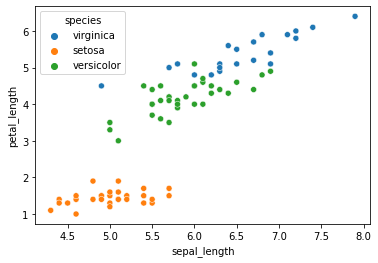

In [4]:
sns.scatterplot(data = train, x = 'sepal_length', y = 'petal_length', hue = 'species');

Let's try sepal_length and petal_length.

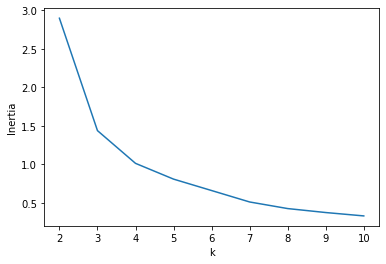

In [5]:
columns = ['sepal_length', 'petal_length']
X = train_scaled[columns]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_
    
pd.Series(inertias).plot(xlabel='k', ylabel='Inertia');

It looks like 3 is the sharpest elbow which makes sense since we have 3 distinct species.

In [6]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

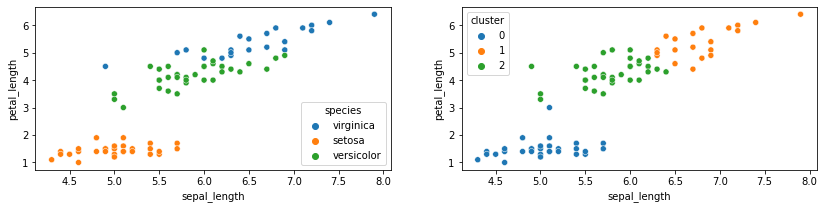

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 3))

sns.scatterplot(data = train, x = 'sepal_length', y = 'petal_length', hue = 'species', ax = ax[0])
sns.scatterplot(data = train, x = 'sepal_length', y = 'petal_length', hue = 'cluster', ax = ax[1]);

There are a few anomolies, but it's not too far off.

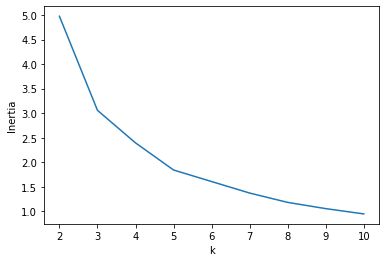

In [8]:
# Now let's try adding sepal_width.
columns = ['sepal_length', 'petal_length', 'sepal_width']
X = train_scaled[columns]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_
    
pd.Series(inertias).plot(xlabel='k', ylabel='Inertia');

We'll use 3 again.

In [9]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

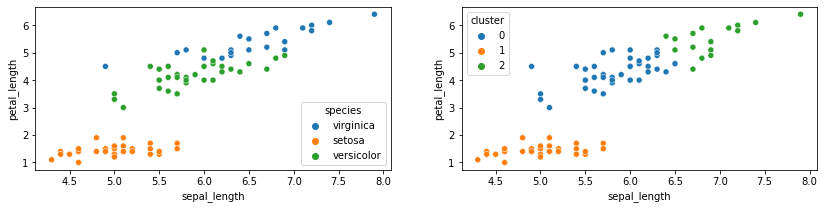

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 3))

sns.scatterplot(data = train, x = 'sepal_length', y = 'petal_length', hue = 'species', ax = ax[0])
sns.scatterplot(data = train, x = 'sepal_length', y = 'petal_length', hue = 'cluster', ax = ax[1]);

Adding sepal_width handled at least one of the anomolies, but may have made other predictions slightly worse.

## 2

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [11]:
from wrangle_mall import *
customers = get_mall_data()
customers.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Let's try creating clusters with age and annual income
columns = ['age', 'annual_income']

train, validate, test = split_data(customers)
train_scaled, _, _ = scale_data(train, validate, test, columns)

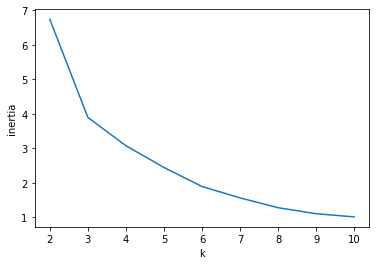

In [13]:
X = train_scaled[columns]

inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertias[k] = kmeans.inertia_
    
pd.Series(inertias).plot(xlabel = 'k', ylabel = 'inertia');

We'll use 3.

In [14]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

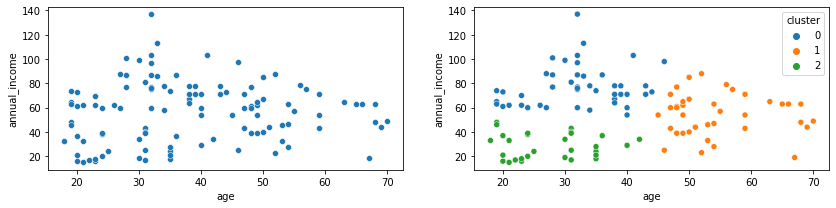

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 3))

sns.scatterplot(data = train, x = 'age', y = 'annual_income', ax = ax[0]);
sns.scatterplot(data = train, x = 'age', y = 'annual_income', hue = 'cluster', ax = ax[1]);

Now that I've seen the clusters it's hard to unsee them.

In [16]:
# Using un-scaled data
columns = ['spending_score', 'annual_income']
X = train[columns]

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

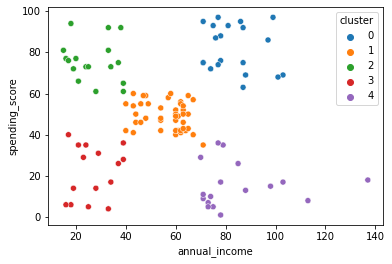

In [17]:
sns.scatterplot(data = train, y = 'spending_score', x = 'annual_income', hue = 'cluster');

In [18]:
# Let's try using different scalers. MinMaxScaler
columns = ['spending_score', 'annual_income']

train_scaled, _, _ = scale_data(train, validate, test, columns)
train_scaled.describe()

,customer_id,age,annual_income,spending_score
count,112.000000,112.000000,112.000000,112.000000
mean,93.258929,38.491071,0.344409,0.513207
std,56.587610,13.778816,0.203901,0.269110
min,2.000000,18.000000,0.000000,0.000000
25%,42.750000,28.000000,0.194672,0.354167
50%,97.500000,35.500000,0.368852,0.510417
75%,139.250000,49.000000,0.483607,0.739583
max,199.000000,70.000000,1.000000,1.000000


In [19]:
X = train_scaled[columns]

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

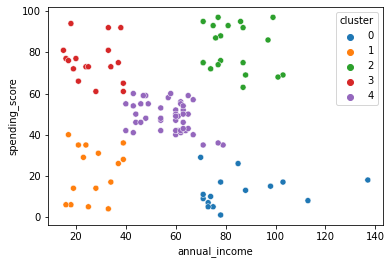

In [20]:
sns.scatterplot(data = train, y = 'spending_score', x = 'annual_income', hue = 'cluster');

In [21]:
# StandardScaler
train_scaled, _, _ = scale_data(train, validate, test, columns, strategy = 'StandardScaler')
train_scaled.describe()

,customer_id,age,annual_income,spending_score
count,112.000000,112.000000,1.120000e+02,1.120000e+02
mean,93.258929,38.491071,-1.298564e-16,-7.087584e-17
std,56.587610,13.778816,1.004494e+00,1.004494e+00
min,2.000000,18.000000,-1.696690e+00,-1.915625e+00
25%,42.750000,28.000000,-7.376601e-01,-5.936425e-01
50%,97.500000,35.500000,1.204196e-01,-1.041478e-02
75%,139.250000,49.000000,6.857427e-01,8.449859e-01
max,199.000000,70.000000,3.229697e+00,1.817032e+00


In [22]:
X = train_scaled[columns]

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

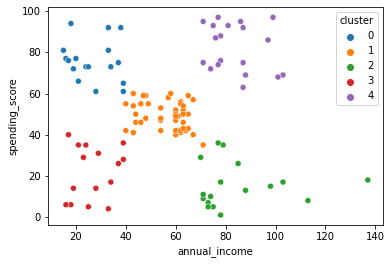

In [23]:
sns.scatterplot(data = train, y = 'spending_score', x = 'annual_income', hue = 'cluster');

In [24]:
# RobustScaler
train_scaled, _, _ = scale_data(train, validate, test, columns, strategy = 'RobustScaler')
train_scaled.describe()

,customer_id,age,annual_income,spending_score
count,112.000000,112.000000,112.000000,112.000000
mean,93.258929,38.491071,-0.084600,0.007239
std,56.587610,13.778816,0.705699,0.698231
min,2.000000,18.000000,-1.276596,-1.324324
25%,42.750000,28.000000,-0.602837,-0.405405
50%,97.500000,35.500000,0.000000,0.000000
75%,139.250000,49.000000,0.397163,0.594595
max,199.000000,70.000000,2.184397,1.270270


In [25]:
X = train_scaled[columns]

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

train['cluster'] = kmeans.predict(X)
train.cluster = train.cluster.astype('category')

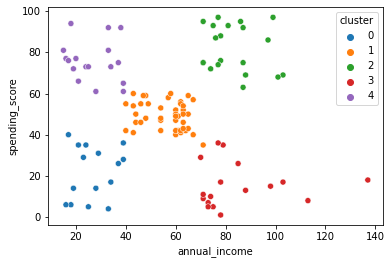

In [26]:
sns.scatterplot(data = train, y = 'spending_score', x = 'annual_income', hue = 'cluster');

## 3

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

### Bonus

1. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
2. Visualize the data and guess the number and shape of the clusters.
3. Implement the KMeans algorithm on unscaled data and visualize the clusters.
4. Repeat the step above but with scaled data. 
5. Write down the takeaways from this exercise.

In [27]:
df = pd.read_csv('cluster_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       800 non-null    float64
 1   y       800 non-null    float64
dtypes: float64(2)
memory usage: 12.6 KB


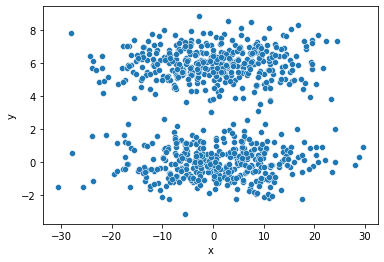

In [28]:
# Splitting data? Who cares?
sns.scatterplot(data = df, x = 'x', y = 'y');

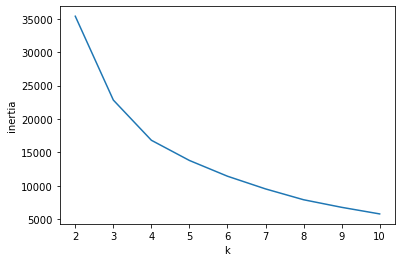

In [29]:
inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    inertias[k] = kmeans.inertia_
    
pd.Series(inertias).plot(xlabel = 'k', ylabel = 'inertia');

In [30]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)

df['cluster'] = kmeans.predict(df)
df.cluster = df.cluster.astype('category')

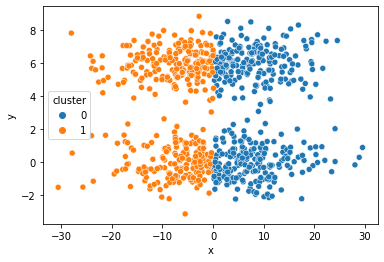

In [31]:
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'cluster');

Now let's try a MinMaxScaler.

In [32]:
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df[['x', 'y']]))
df_scaled.columns = df[['x', 'y']].columns

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_scaled)

df_scaled['cluster'] = kmeans.predict(df_scaled)
df_scaled.cluster = df_scaled.cluster.astype('category')

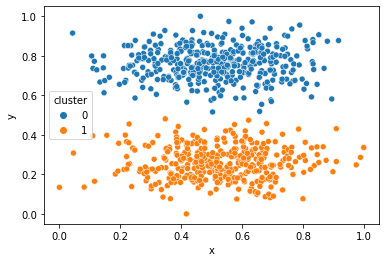

In [33]:
sns.scatterplot(data = df_scaled, x = 'x', y = 'y', hue = 'cluster');

In [34]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df[['x', 'y']]))
df_scaled.columns = df[['x', 'y']].columns

In [35]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_scaled)

df_scaled['cluster'] = kmeans.predict(df_scaled)
df_scaled.cluster = df_scaled.cluster.astype('category')

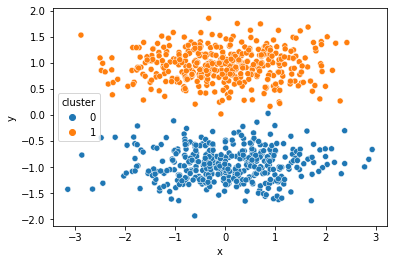

In [36]:
sns.scatterplot(data = df_scaled, x = 'x', y = 'y', hue = 'cluster');

In [37]:
df_scaled = pd.DataFrame(RobustScaler().fit_transform(df[['x', 'y']]))
df_scaled.columns = df[['x', 'y']].columns

In [38]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_scaled)

df_scaled['cluster'] = kmeans.predict(df_scaled)
df_scaled.cluster = df_scaled.cluster.astype('category')

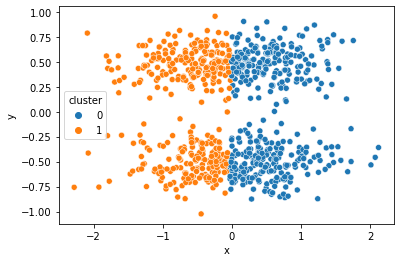

In [39]:
sns.scatterplot(data = df_scaled, x = 'x', y = 'y', hue = 'cluster');

Takeaways:

- Scaling the data definitely makes a difference.
- The robust scaler provides the same results as not scaling the data.